In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import sklearn
#HAM emails imp emails general emails
#Spam harmful emails
#Importing logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Logistic regression when we are just dealing with 2 values just for binary operations

In [ ]:
#IMPPOrting ACCURACY Score functions
from sklearn.metrics import accuracy_score

In [ ]:
#Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
#Our dtype is string so we have to convert string into numerical format
#Converting str to num forms
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
raw_mail_data=pd.read_csv('spam.csv')
raw_mail_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#Checking NULL values
raw_mail_data.isnull().sum()
#Another method
#Repalcing all the NULL values with NULL String
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')
mail_data.info()
#Above method is used for replacing null values to string to num form or other form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Printing first 5 rows
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
mail_data.tail() hai

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,,,
5568,ham,Will �_ b going to esplanade fr home?,,,
5569,ham,"Pity, * was in mood for that. So...any other s...",,,
5570,ham,The guy did some bitching but I acted like i'd...,,,
5571,ham,Rofl. Its true to its name,,,


In [ ]:
mail_data.shape
#No of rows:5572
#no of cols :2

(5572, 5)

In [ ]:
#LABEL ENCODING
#Converting string | object into nnum firm
#label spam email as 0 and ham email as 1
mail_data.loc[mail_data['v1']== 'ham', 'v1']=1

In [ ]:
mail_data.loc[mail_data['v1']== 'spam', 'v1']=0

In [ ]:
mail_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",,,
1,1,Ok lar... Joking wif u oni...,,,
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,1,U dun say so early hor... U c already then say...,,,
4,1,"Nah I don't think he goes to usf, he lives aro...",,,
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,,,
5568,1,Will �_ b going to esplanade fr home?,,,
5569,1,"Pity, * was in mood for that. So...any other s...",,,
5570,1,The guy did some bitching but I acted like i'd...,,,


In [ ]:
#checking no ofspam and ham emails
#Find the total no oas ham and spam e
mail_data['v1'].value_counts()

,count
v1,
1,4825
0,747


In [ ]:
#Categorizing X and Y
#seperating data as texts and labels
#Y:Label
X=mail_data['v2']#I/p Feature
Y=mail_data['v1']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


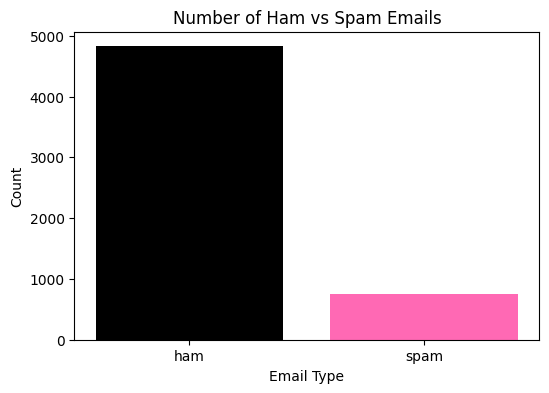

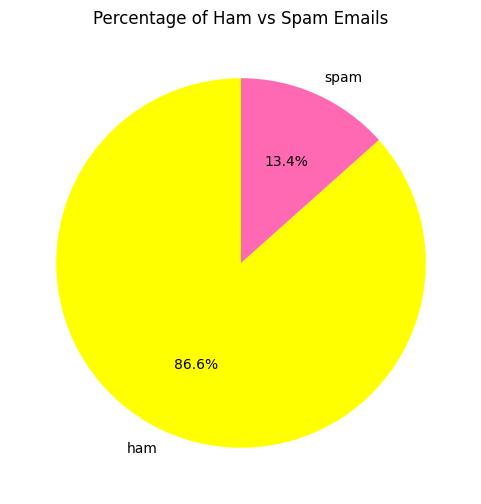

In [ ]:
# Rename columns if not already renamed
raw_mail_data = raw_mail_data.rename(columns={'v1': 'label', 'v2': 'message'})

# Count ham and spam
label_counts = raw_mail_data['label'].value_counts()

# 1️⃣ Bar Chart - Number of Ham vs Spam
plt.figure(figsize=(6,4))
plt.bar(label_counts.index, label_counts.values, color=['black','hotpink'])
plt.title("Number of Ham vs Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

# 2️⃣ Pie Chart - Percentage Distribution
plt.figure(figsize=(6,6))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['yellow','hotpink'])
plt.title("Percentage of Ham vs Spam Emails")
plt.show()

In [ ]:
#Splitting the data into training and testing data
#Training data-'X_train', Y_train
#Testing data=X_test Y_test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)
#Random sate usually seperates by a random format
print(X.shape,X_train.shape,Y_test.shape)

(5572,) (4457,) (1115,)


In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
#TRanforming the txt data to feature vectors that can be jused as and input to logistic regression
feature_extraction=TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
#min_df- minimum documnet frequency it must be ie words that must be repeated atleast once
#stop_words-english_words
#lowercase=True all data converted into lowercase

In [ ]:
X_train_num=feature_extraction.fit_transform(X_train)
X_test_num=feature_extraction.transform(X_test)

In [ ]:
#Convert y train values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [ ]:
#Training the MODEL
model=LogisticRegression()

In [ ]:
#Training the logRegression model with training data
model.fit(X_train_num,Y_train)

LogisticRegression()

In [ ]:
#Evaluating the trained Model
X_train_prediction=model.predict(X_train_num)

In [ ]:
#Evaluating for the testing data

In [ ]:
X_test_prediction=model.predict(X_test_num)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("ACCcuracy score of Testing data is :",testing_data_accuracy)

ACCcuracy score of Testing data is : 0.9551569506726457


In [ ]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("ACCcuracy score of Training data is :",training_data_accuracy)

ACCcuracy score of Training data is : 0.971729863136639


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train_num,Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
#Evaluating the trained Model
X_train_prediction=svc.predict(X_train_num)
#Finding the accuuracy score on training data
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("ACCcuracy score of Training data is :",training_data_accuracy)

ACCcuracy score of Training data is : 0.9961857751851021


In [ ]:
#evaluating the testing data
X_test_prediction=svc.predict(X_test_num)
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("ACCcuracy score of Testing data is :",testing_data_accuracy)

ACCcuracy score of Testing data is : 0.9757847533632287


In [ ]:
# Building a predictive system
input_data = ['K tell me anything about you.']

# Convert input to numerical form using same vectorizer
input_data_num = feature_extraction.transform(input_data)

# Use trained model to make prediction
prediction = model.predict(input_data_num)   # or svc.predict(...) if using SVM

if prediction[0] == 0:   # remember: ham=0, spam=1
    print("Ham email")
else:
    print("Spam email")

Spam email


In [ ]:
#Making predictions
prediction=model.predict(input_data_num)
if prediction[0]==1:
  print("HAm email")
else:
  print("SPAM email")

HAm email


In [ ]:
input_data=['Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!']
input_data_num=feature_extraction.transform
if prediction[0]==1:
  print("HAm email")
else:
  print("SPAM email")

HAm email


In [ ]:
# Sample emails for testing
sample_emails = [
    # Spam examples
    "Congratulations! You have won $1,000,000 in our lucky draw. Click here to claim your prize immediately.",
    "Dear Customer, your bank account has been suspended due to suspicious activity. Please login here to verify your details: http://fakebank.com/login",
    "We are offering you a high-paying job from home with no experience required. Reply with your personal details to get started.",
    "Get 90% discount on branded products only today! Limited time offer. Visit http://scam-offer.com now.",
    "Important document attached. Please open immediately to avoid account suspension.",

    # Ham examples
    "Hi John, can we reschedule our meeting to tomorrow at 3 PM?",
    "Don’t forget to bring the documents for the client presentation.",
    "Happy Birthday! Wishing you a great year ahead.",
    "K tell me anything about you.",
    "Let's go for lunch after the class."
]

# Loop through and predict each one
for email in sample_emails:
    input_data_num = feature_extraction.transform([email])
    prediction = model.predict(input_data_num)   # or svc.predict(...) if you want SVM

    if prediction[0] == 0:   # ham = 0, spam = 1
        print(f"Email: {email[:50]}... → ✅ Ham")
    else:
        print(f"Email: {email[:50]}... → 🚨 Spam")

Email: Congratulations! You have won $1,000,000 in our lu... → ✅ Ham
Email: Dear Customer, your bank account has been suspende... → 🚨 Spam
Email: We are offering you a high-paying job from home wi... → 🚨 Spam
Email: Get 90% discount on branded products only today! L... → 🚨 Spam
Email: Important document attached. Please open immediate... → 🚨 Spam
Email: Hi John, can we reschedule our meeting to tomorrow... → 🚨 Spam
Email: Don’t forget to bring the documents for the client... → 🚨 Spam
Email: Happy Birthday! Wishing you a great year ahead.... → 🚨 Spam
Email: K tell me anything about you.... → 🚨 Spam
Email: Let's go for lunch after the class.... → 🚨 Spam
